<a href="https://colab.research.google.com/github/devdebdeb/ML-Classificacao/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 31.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from collections import Counter
from imblearn.under_sampling import NearMiss
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel, RFE, RFECV


#Hotel

## Dados

In [ ]:
hotel_url = 'https://raw.githubusercontent.com/alura-cursos/selecao-de-features/main/dados/hotel.csv'

In [ ]:
hotel_df = pd.read_csv(hotel_url)

In [ ]:
hotel_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,2,2,0,82,2018,10,30,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,1,0,109,2017,7,16,0,...,0,0,0,0,0,0,0,0,1,1
2,2,0,0,1,0,105,2018,4,6,0,...,0,0,0,0,0,0,0,1,0,1
3,1,0,0,3,0,13,2018,4,19,0,...,0,0,0,0,1,0,0,0,0,0
4,2,0,0,2,0,81,2018,8,5,0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34141,2,0,1,2,0,305,2018,11,4,0,...,0,0,0,0,0,0,0,1,0,1
34142,2,0,0,3,0,67,2018,9,28,0,...,0,0,0,0,0,0,0,0,1,1
34143,1,0,0,2,0,193,2018,6,20,0,...,0,0,0,0,0,0,0,0,1,1
34144,2,0,2,1,0,85,2017,7,5,0,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
hotel_df.isnull().sum().sum()

0

One-Hot Encoding: transformar uma das variaveis categóricas em 1 e o resto em 0.

In [ ]:
X = hotel_df.drop(['booking_status'], axis=1)
y = hotel_df['booking_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size=0.3, stratify=y)

## Modelo

In [ ]:
model_rfc = RandomForestClassifier(random_state=2)

In [ ]:
model_rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [ ]:
model_rfc.score(X_test, y_test)

0.920636470128856

In [ ]:
hotel_df['booking_status'].value_counts()

,count
booking_status,
0,17073
1,17073


## Entendendo as features

"Os boxplots mostram a distribução das features em relação à classe alvo, ajudando a identificar aquelas com maior variação entre as classes"

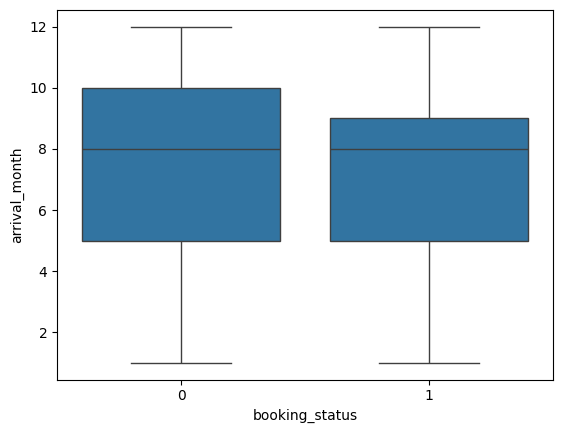

In [ ]:
sns.boxplot(X_train, x=y_train, y='arrival_month');

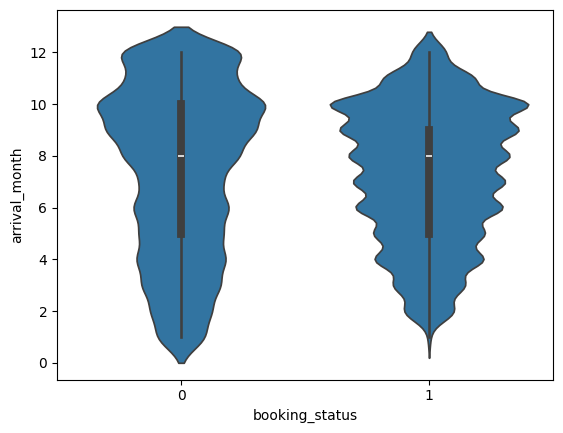

In [ ]:
sns.violinplot(X_train, x=y_train, y='arrival_month');

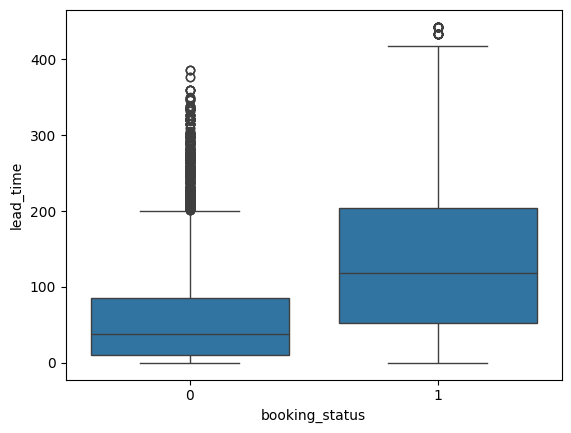

In [ ]:
sns.boxplot(X_train, x=y_train, y='lead_time');

##Correlação entre features

In [ ]:
correlacao = pd.concat([X_train, y_train],axis=1).corr()

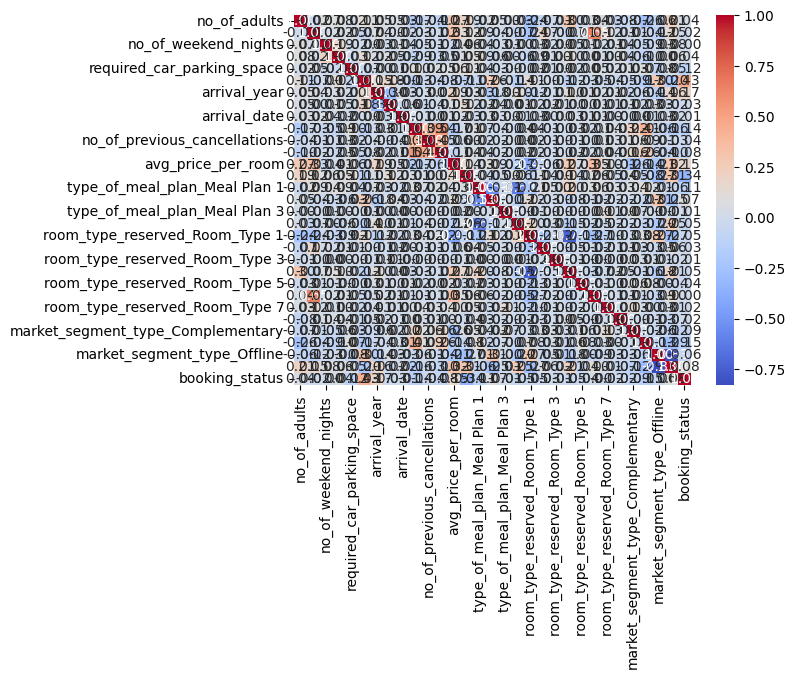

In [ ]:
sns.heatmap(correlacao, annot=True, cmap='coolwarm',fmt='.2f');

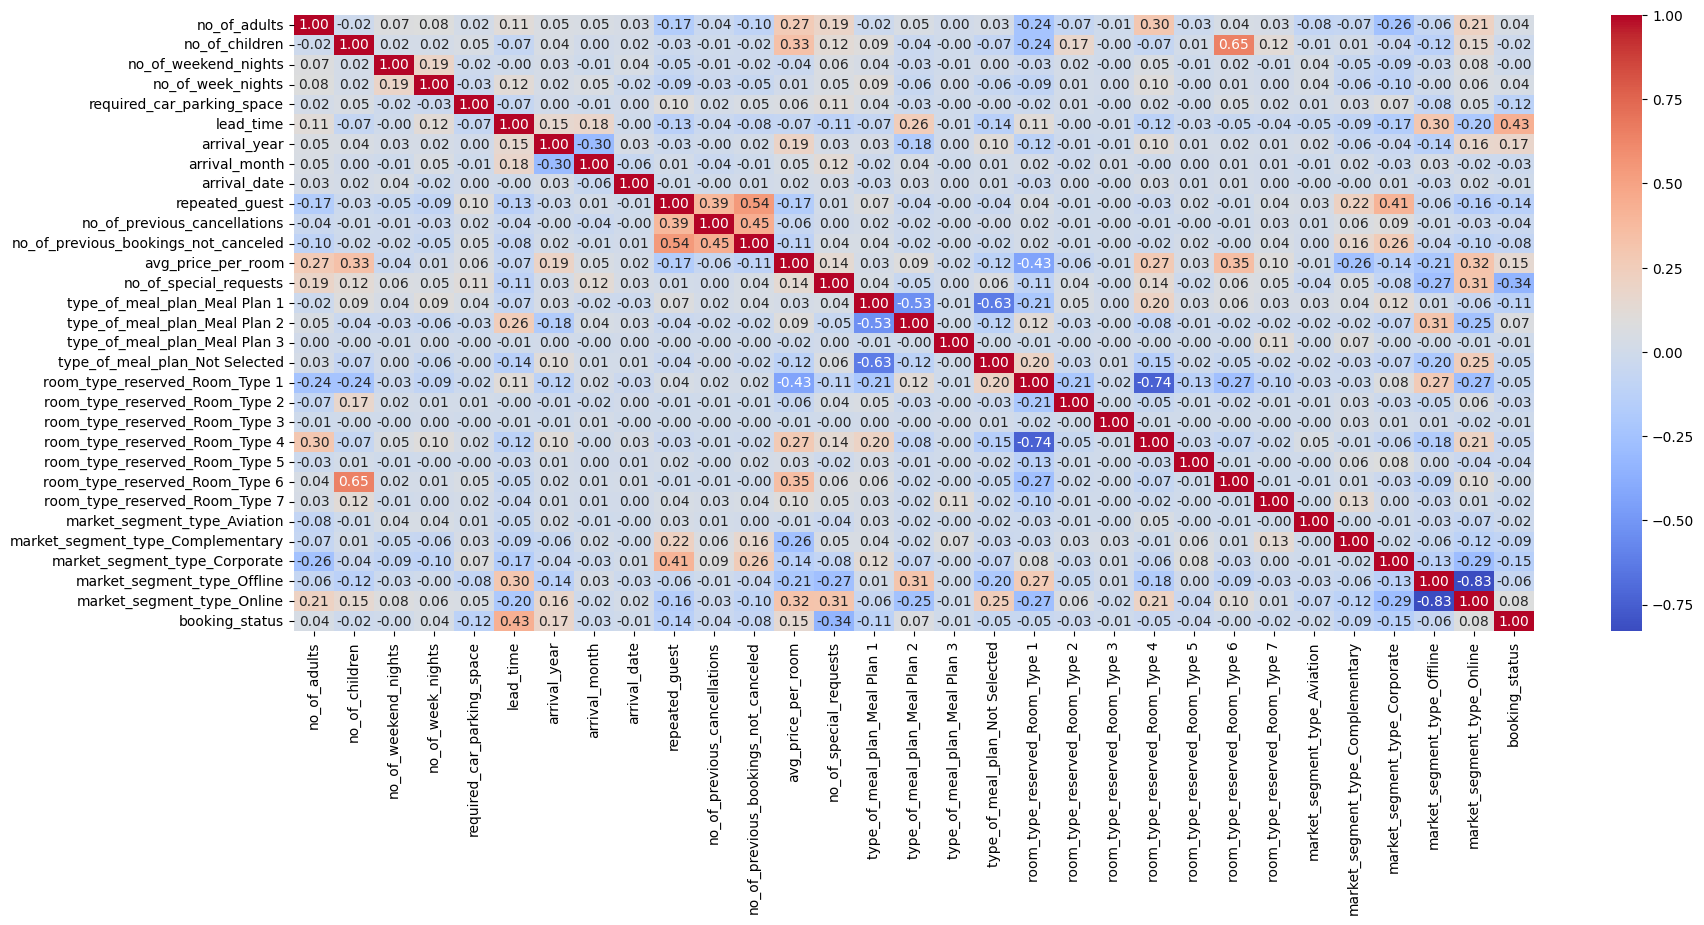

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm',fmt='.2f');

## Feature Importance

In [ ]:
rfc_fi = RandomForestClassifier(random_state=2)

In [ ]:
rfc_fi.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [ ]:
importance = pd.DataFrame({'columns':X_train.columns, 'importance':rfc_fi.feature_importances_})

In [ ]:
importance_10 = importance.sort_values(by='importance', ascending=False).head(10)

<ipython-input-22-d1d6cba09c39>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=75);


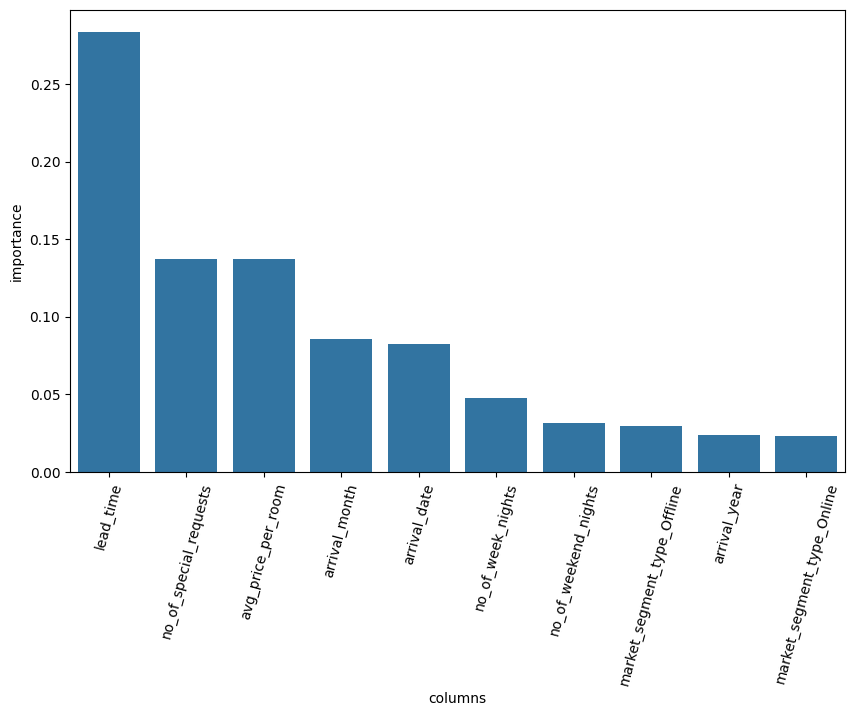

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='columns', y='importance', data=importance_10)
ax.set_xticklabels(ax.get_xticklabels(),rotation=75);

##Feature Selection

### SelectFromModel

In [ ]:
modelo_fselecionadas = SelectFromModel(model_rfc, max_features=10, prefit=True)

In [ ]:
X_train_selecionado = modelo_fselecionadas.transform(X_train)
X_test_selecionado = modelo_fselecionadas.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
modelo = RandomForestClassifier(random_state=2)

In [ ]:
modelo.fit(X_train_selecionado, y_train)

RandomForestClassifier(random_state=2)

In [ ]:
modelo.score(X_test_selecionado, y_test)

0.8976962124170246

### Validação Cruzada para SelectFromModel

In [ ]:
m_rfc = RandomForestClassifier(random_state=2)

In [ ]:
param_search = {
    'n_estimators':[100,200,300],
    'max_depth': [None,10,20],
    'min_samples_split':[2,5],
    'min_samples_leaf': [1,2]
 }

In [ ]:
grid_search = GridSearchCV(estimator=m_rfc, param_grid=param_search, scoring='accuracy', cv=5, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid_search.cv_results_

In [ ]:
m_fselected = SelectFromModel(grid_search.best_estimator_, max_features=10, prefit=True)

In [ ]:
X_train_selected = m_fselected.transform(X_train)
X_test_selected = m_fselected.transform(X_test)

In [ ]:
model = grid_search.best_estimator_

In [ ]:
model.fit(X_train_selected, y_train)

In [ ]:
model.score(X_test_selected, y_test)

### Matriz de confusão para verificar os resultados

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict(X_test_selected)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

Text(50.722222222222214, 0.5, 'Real')

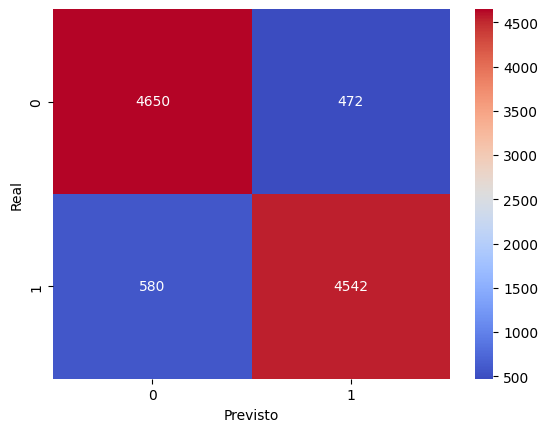

In [ ]:
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d');
plt.xlabel('Previsto')
plt.ylabel('Real')

### Curva Roc

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr,tpr,treshoulds= roc_curve(y_test, y_pred)

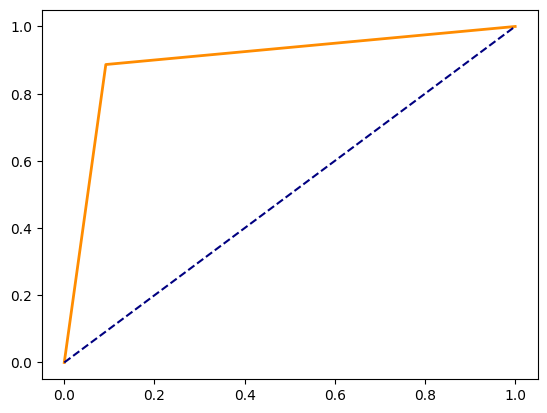

In [ ]:
plt.plot(fpr,tpr,color='darkorange', lw=2)
plt.plot([0,1],[0,1], color='navy', linestyle='--');

In [ ]:
roc_auc = auc(fpr,tpr)

In [ ]:
roc_auc

0.8973057399453339

### RFE Selection

In [ ]:
grid_search = {
    'max_depth':None,
    'min_samples_leaf':1,
    'min_samples_split':2,
    'n_estimators':300
    }

In [ ]:
params = {
    'max_depth':None,
    'min_samples_leaf':1,
    'min_samples_split':2,
    'n_estimators':300,
    'random_state': 2
    }

In [ ]:
model=RandomForestClassifier(**params)

In [ ]:
select = RFE(model,n_features_to_select=10,step=1)

In [ ]:
select.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=300, random_state=2),
    n_features_to_select=10)

In [ ]:
X_train_select = select.transform(X_train)
X_test_select = select.transform(X_test)

In [ ]:
model.fit(X_train_select, y_train)

RandomForestClassifier(n_estimators=300, random_state=2)

In [ ]:
model.score(X_test_select, y_test)

0.9126317844591956

In [ ]:
y_pred = model.predict(X_test_select)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

<Axes: >

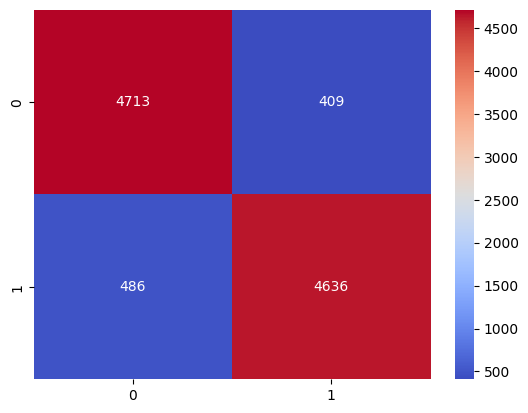

In [ ]:
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm',fmt='d');

###RFECV Selection-CV

In [ ]:
model = RandomForestClassifier(**params)

In [ ]:
cv = StratifiedKFold(5, shuffle=True, random_state=500)

In [ ]:
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=cv,
    scoring="roc_auc",
    min_features_to_select=1,
    importance_getter='auto'
)

In [ ]:
rfecv.fit(X_train,y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=500, shuffle=True),
      estimator=RandomForestClassifier(n_estimators=300, random_state=2),
      scoring='roc_auc')

In [ ]:
print("O número ideal de features é ", rfecv.n_features_)

O número ideal de features é  25


In [ ]:
print("O ranking das features é ", rfecv.ranking_)

O ranking das features é  [1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 6 1 1 1 5 1 1 1 4 2 1 1 1 1]


In [ ]:
print("O scoring do modelo através da métrica roc_auc é ", rfecv.cv_results_)

O scoring do modelo através da métrica roc_auc é  {'mean_test_score': array([0.76154345, 0.87839775, 0.90458683, 0.94491056, 0.95526299,
       0.95713147, 0.96172095, 0.9619459 , 0.96508946, 0.96545119,
       0.96600555, 0.96636283, 0.96654828, 0.96653068, 0.96700983,
       0.96842023, 0.96922436, 0.96933057, 0.96897245, 0.96914412,
       0.96911669, 0.96916082, 0.96924454, 0.96912505, 0.96992768,
       0.96991859, 0.96983684, 0.96988479, 0.96954651, 0.96953734]), 'std_test_score': array([0.02230485, 0.00513526, 0.00256538, 0.00215576, 0.00235998,
       0.00214142, 0.00143015, 0.00134581, 0.0012676 , 0.00140743,
       0.001545  , 0.00160935, 0.00118657, 0.00139523, 0.00150719,
       0.00162719, 0.00170077, 0.00154041, 0.00171934, 0.00164235,
       0.00144254, 0.00143644, 0.00120112, 0.00121457, 0.00127118,
       0.00121897, 0.00149984, 0.00099933, 0.00123228, 0.00116114]), 'split0_test_score': array([0.77913523, 0.88305492, 0.90862325, 0.94651964, 0.95776255,
       0.9599401

In [ ]:
y_pred = rfecv.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

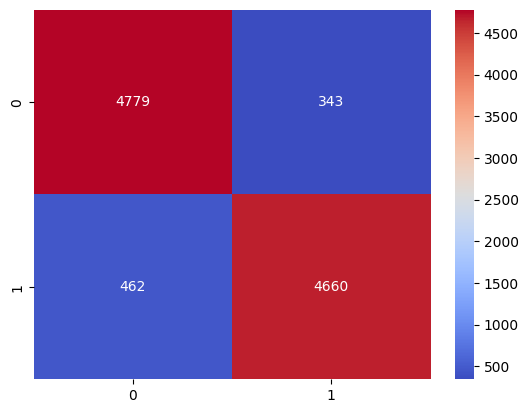

In [ ]:
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d');

In [ ]:
result = rfecv.cv_results_
result['mean_test_score']

array([0.76154345, 0.87839775, 0.90458683, 0.94491056, 0.95526299,
       0.95713147, 0.96172095, 0.9619459 , 0.96508946, 0.96545119,
       0.96600555, 0.96636283, 0.96654828, 0.96653068, 0.96700983,
       0.96842023, 0.96922436, 0.96933057, 0.96897245, 0.96914412,
       0.96911669, 0.96916082, 0.96924454, 0.96912505, 0.96992768,
       0.96991859, 0.96983684, 0.96988479, 0.96954651, 0.96953734])

In [ ]:
results_df = pd.DataFrame({'Values': result['mean_test_score']})

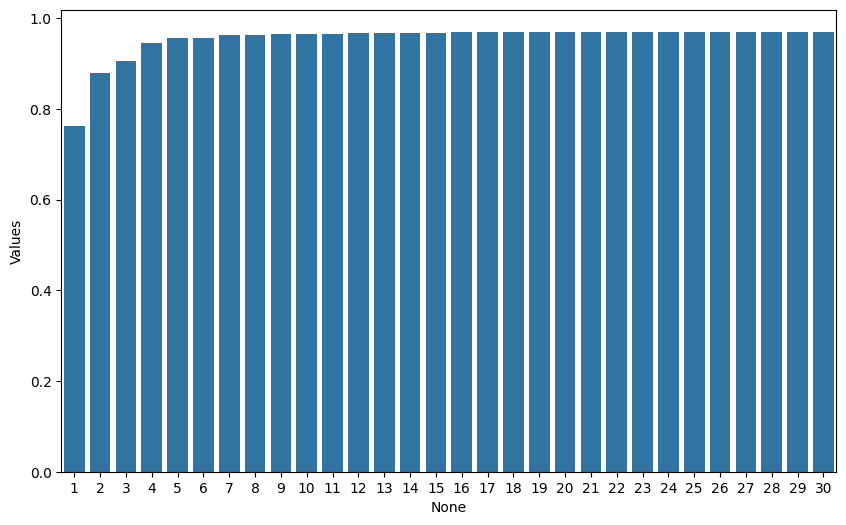

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=results_df.index+1, y='Values', data=results_df);

# Pistache

## Dados

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/selecao-de-features/main/dados/pistachio.csv'

In [ ]:
pistache_df = pd.read_csv(url)
pistache_df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio


In [ ]:
pistache_df.isnull().sum().sum()

0

In [ ]:
pistache_df['Class'].value_counts()

,count
Class,
Kirmizi_Pistachio,998
Siit_Pistachio,720


In [ ]:
pistache_df.shape

(1718, 17)

##Binarize (categorical) target columns
pd.get_dummies foi um grande achado

In [ ]:
df_one = pd.get_dummies(pistache_df['Class'])
print(df_one)

      Kirmizi_Pistachio  Siit_Pistachio
0                  True           False
1                 False            True
2                  True           False
3                  True           False
4                  True           False
...                 ...             ...
1713               True           False
1714               True           False
1715              False            True
1716               True           False
1717              False            True

[1718 rows x 2 columns]


In [ ]:
#Binarize target column from categorical
df_two = pd.concat((df_one, pistache_df), axis=1)
df_two = df_two.drop(["Class"], axis=1)
df_two = df_two.drop(["Kirmizi_Pistachio"], axis=1)
binaried_df = df_two.rename(columns={"Siit_Pistachio":"Class"})

In [ ]:
binaried_df

,Class,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
0,False,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664
1,True,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802
2,False,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591
3,False,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807
4,False,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,False,65570,2071.4451,418.0258,217.1458,0.8545,288.9400,0.8976,73054,0.5945,1.9251,0.1920,0.6912,0.0064,0.0033,0.4778,0.9197
1714,False,68849,1441.2590,451.0457,205.2553,0.8905,296.0764,0.9340,73716,0.6459,2.1975,0.4165,0.6564,0.0066,0.0030,0.4309,0.9469
1715,True,90270,1370.5380,428.9636,269.8232,0.7774,339.0211,0.9722,92847,0.7400,1.5898,0.6039,0.7903,0.0048,0.0030,0.6246,0.9930
1716,False,73148,1309.8430,469.0491,208.3141,0.8960,305.1801,0.9376,78014,0.6341,2.2516,0.5358,0.6506,0.0064,0.0028,0.4233,0.9532


In [ ]:
X=binaried_df.drop('Class', axis=1)
y=binaried_df['Class']

## 1model+Exploração

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=50, test_size=0.3)

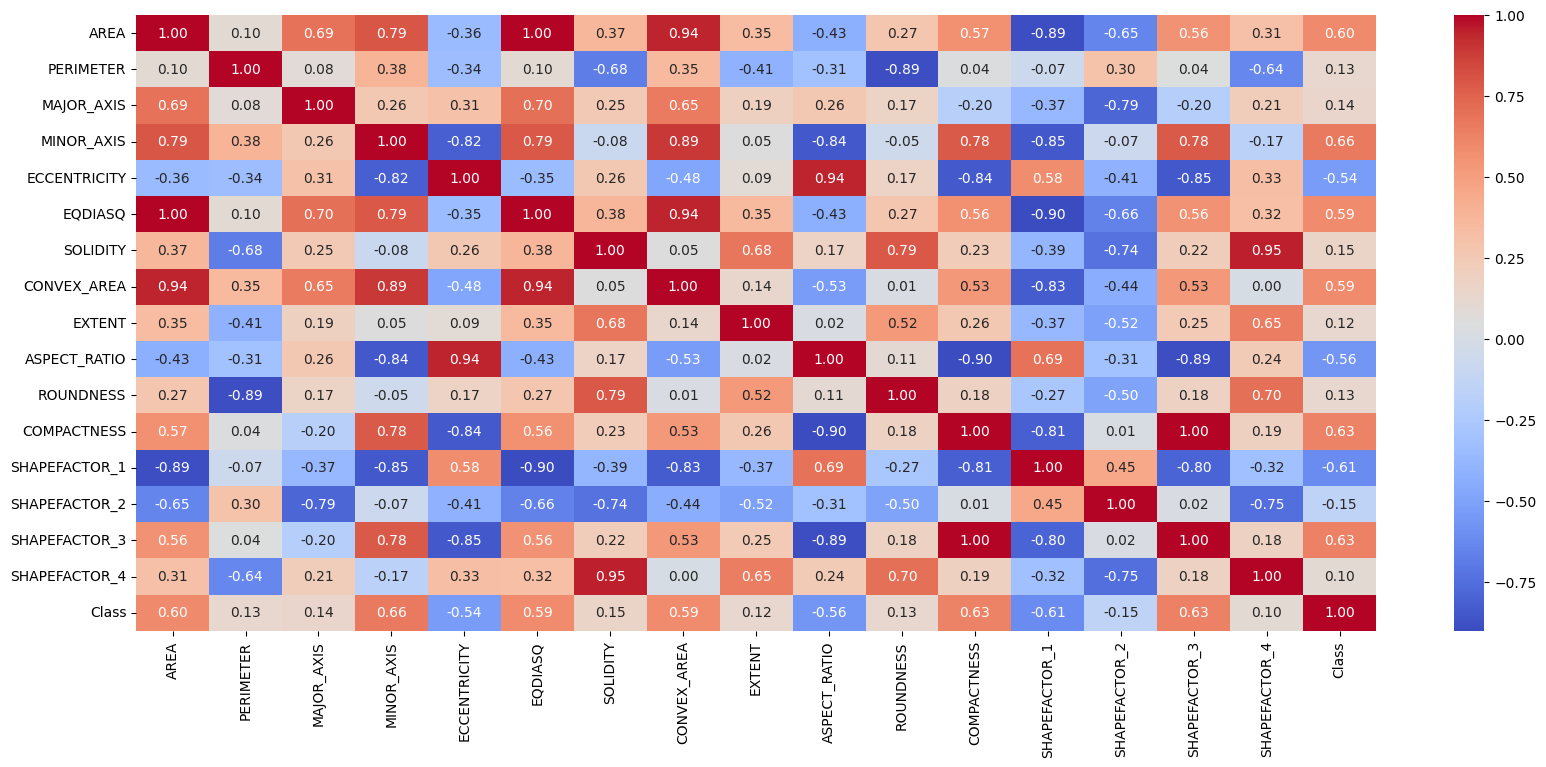

In [ ]:
correlacao_pistache = pd.concat([X_train, y_train],axis=1).corr()
plt.figure(figsize=(20,8))
sns.heatmap(correlacao_pistache, annot=True, cmap='coolwarm',fmt='.2f');

### Box plots

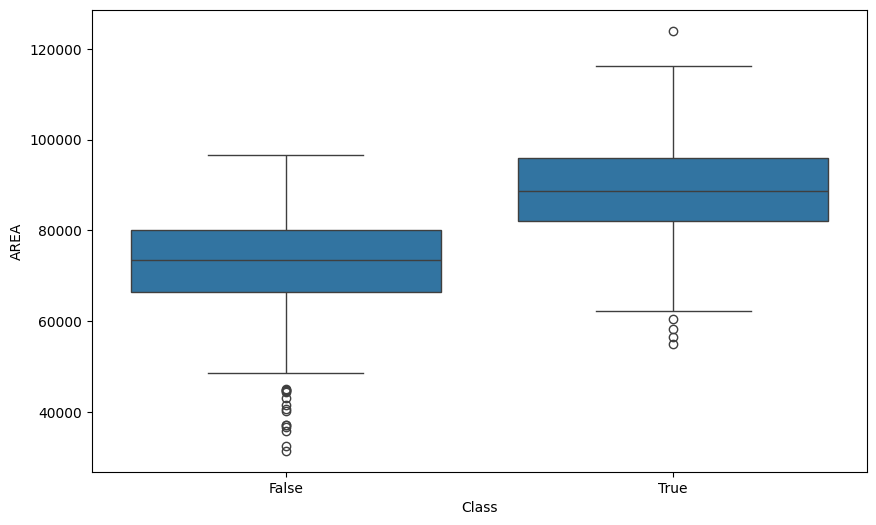

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(X_train,x=y_train, y="AREA");

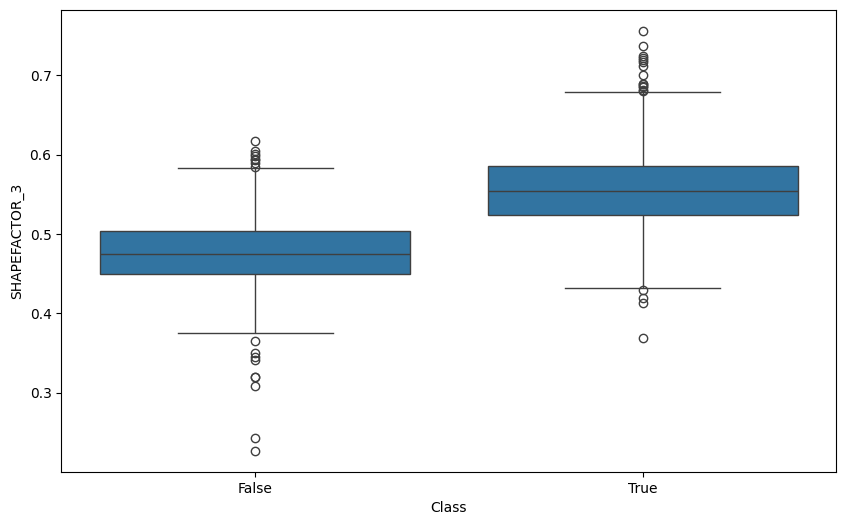

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(X_train,x=y_train, y="SHAPEFACTOR_3");

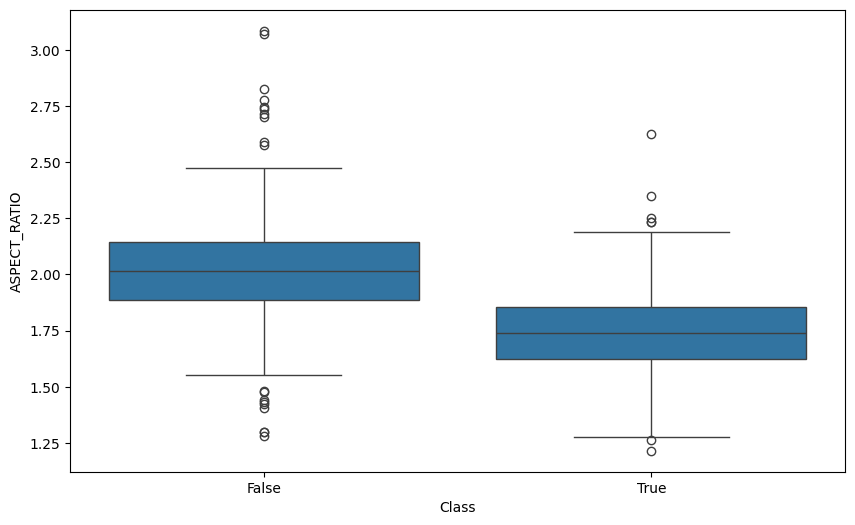

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(X_train,x=y_train, y="ASPECT_RATIO");

In [ ]:
pistache_rfc = RandomForestClassifier(random_state=2)

In [ ]:
pistache_rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [ ]:
print(f"{pistache_rfc.score(X_test,y_test):.3f}")

0.872


### top10features - Pistache Feature importance

In [ ]:
rfc_pistache_fi = RandomForestClassifier(n_estimators=20, random_state=2)

In [ ]:
rfc_pistache_fi.fit(X_train, y_train)
print(rfc_pistache_fi.score(X_test, y_test))

0.875968992248062


In [ ]:
pistache_importance = pd.DataFrame({'columns':X_train.columns, 'importance':rfc_pistache_fi.feature_importances_})

In [ ]:
top10_pistache_importance = importance.sort_values(by='importance', ascending=False).head(10)
print(top10_pistache_importance)

          columns  importance
3      MINOR_AXIS    0.222299
14  SHAPEFACTOR_3    0.122697
12  SHAPEFACTOR_1    0.111093
11    COMPACTNESS    0.088631
0            AREA    0.072532
7     CONVEX_AREA    0.066264
15  SHAPEFACTOR_4    0.049067
5         EQDIASQ    0.041517
6        SOLIDITY    0.038568
9    ASPECT_RATIO    0.031610


## Select features


### Modelo com selectfeatures

In [ ]:
model_fselect = SelectFromModel(rfc_pistache_fi, max_features=10,prefit=True)

In [ ]:
X_trainsel = model_fselect.transform(X_train)
X_testsel = model_fselect.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
model = RandomForestClassifier(n_estimators=20, random_state=2)

In [ ]:
model.fit(X_trainsel, y_train)

RandomForestClassifier(n_estimators=200, random_state=2)

In [ ]:
print(f'Score: {model.score(X_trainsel,y_train)}')

Score: 1.0


### GridSearchCV

In [ ]:
model = RandomForestClassifier(random_state=2)

In [ ]:
search_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=search_params,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
model_fselect = SelectFromModel(grid_search.best_estimator_, max_features=10, prefit=True)

In [ ]:
X_trainsel, X_testsel = model_fselect.transform(X_train), model_fselect.transform(X_test)

In [ ]:
model = grid_search.best_estimator_
model.fit(X_trainsel, y_train)

In [ ]:
print(model.score(X_testsel, y_test))

## RFE

In [ ]:
pistache_model = RandomForestClassifier(n_estimators=20, random_state=2)

In [ ]:
pistache_select = RFE(pistache_model, n_features_to_select=10, step=1)
pistache_select.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=20, random_state=2),
    n_features_to_select=10)

In [ ]:
X_train_select, X_test_select = pistache_select.transform(X_train), pistache_select.transform(X_test)

In [ ]:
pistache_model.fit(X_train_select, y_train)
print('Score', pistache_model.score(X_test_select, y_test))

Score 0.8585271317829457


##RFECV+skf

In [ ]:
pistache_model = RandomForestClassifier(n_estimators=20, random_state=2)

In [ ]:
rfecv = RFECV(
    estimator=pistache_model,
    step=1,
    cv=StratifiedKFold(5, shuffle=True, random_state=500),
    scoring='roc_auc',
    min_features_to_select=1,
    importance_getter='auto'
)

In [ ]:
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=500, shuffle=True),
      estimator=RandomForestClassifier(n_estimators=20, random_state=2),
      scoring='roc_auc')

In [ ]:
print('O número ideal de features é', rfecv.n_features_)

O número ideal de features é 13


In [ ]:
print('Ranking das features:', rfecv.ranking_)

Ranking das features: [1 3 1 1 1 1 2 1 1 1 1 1 1 4 1 1]


In [ ]:
print('Score:', rfecv.cv_results_)

Score: {'mean_test_score': array([0.84477179, 0.89474355, 0.91588146, 0.91255816, 0.91942075,
       0.92053413, 0.92330398, 0.92297095, 0.92073777, 0.9222035 ,
       0.91902092, 0.92558437, 0.92661952, 0.92372002, 0.9262375 ,
       0.92516076]), 'std_test_score': array([0.01734639, 0.0097754 , 0.00145006, 0.00991034, 0.00493006,
       0.00346184, 0.00636084, 0.00719855, 0.00444623, 0.00372875,
       0.00635631, 0.00697089, 0.00722402, 0.01448119, 0.00351627,
       0.00833154]), 'split0_test_score': array([0.85606383, 0.90567376, 0.9143617 , 0.91117021, 0.92578014,
       0.92191489, 0.92152482, 0.92365248, 0.92723404, 0.92712766,
       0.91241135, 0.9270922 , 0.93113475, 0.93812057, 0.92808511,
       0.93553191]), 'split1_test_score': array([0.84553191, 0.87808511, 0.91475177, 0.9043617 , 0.91329787,
       0.92407801, 0.92421986, 0.91393617, 0.91379433, 0.92109929,
       0.92198582, 0.93166667, 0.91879433, 0.91588652, 0.92687943,
       0.92599291]), 'split2_test_score': arra

### Result analysis

In [ ]:
y_pred = rfecv.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

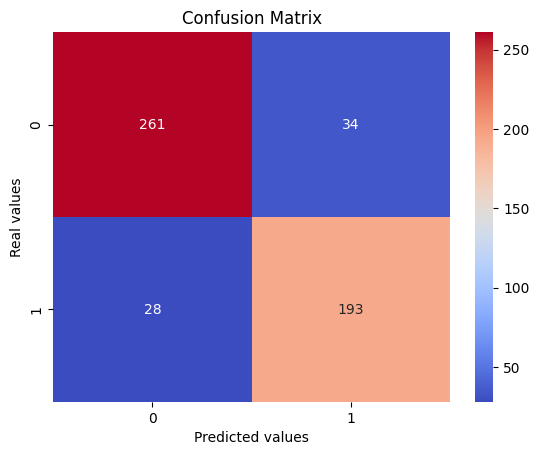

In [ ]:
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.title('Confusion Matrix');

# Experimenting efficiency

##Optimizing Hiper Params
Usar gridsearchCV foi sem embasamento que me custou 2 horas, na próxima vez utilizar outro modelo CV (BayesSearchCV).


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [ ]:
rf_grid = RandomForestClassifier()
gr_space = {
    'max_depth': [3,5,7,10],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [10, 20, 30 , 40],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rf_grid,gr_space, cv=3, scoring='accuracy', verbose=3)
model_grid=grid.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.765 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.865 total time=   0.4s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.829 total time=   0.4s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.775 total time=   0.9s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.867 total time=   0.8s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.829 total time=   1.0s


KeyboardInterrupt: 

In [ ]:
print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

'max_depth': 3,

'max_features': 30,

'min_samples_leaf': 4,

'n_estimators': 100

## 2model+10features
Após o gridsearchCV achar os melhores parametros o modelo desempenhou pior (não sei como)
Param_grid ineficiente, mais um motivo para usar outro modelo CV em casos como este

In [ ]:
model2_rfc = RandomForestClassifier(random_state=2)

In [ ]:
model2_rfc.fit(X_train, y_train)

In [ ]:
print(f"{model2_rfc.score(X_test, y_test):.3}")

###Undesampling majority data
Reduziu a accuracy do modelo inicial

In [ ]:
nm1 = NearMiss(version=1)
X_resampled, y_resampled = nm1.fit_resample(X, y)
#print(sorted(Counter(y_resampled).items()))

In [ ]:
print(X_resampled.shape)
#print(y_resampled.shape)

(1440, 16)


## Experimenting SelectKBest
Apresentou os mesmos 10 porém o método foi mais demorado e os 10 não estavam ordenados

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
X_clf = pistache_df.iloc[:,:16]
y_clf = pistache_df.iloc[:,-1]

In [ ]:
X_clf_new=SelectKBest(score_func=chi2,k=10).fit_transform(X_clf,y_clf)

In [ ]:
print(X_clf_new[:5])

[[7.3107000e+04 1.1618070e+03 4.4240740e+02 2.1772610e+02 3.0509460e+02
  7.7579000e+04 2.0319000e+00 6.8060000e-01 6.8960000e-01 4.7560000e-01]
 [8.9272000e+04 1.1731810e+03 4.6025510e+02 2.5195460e+02 3.3714190e+02
  9.2598000e+04 1.8267000e+00 8.1510000e-01 7.3250000e-01 5.3660000e-01]
 [6.0955000e+04 9.9978900e+02 3.8692470e+02 2.0912550e+02 2.7858630e+02
  6.4400000e+04 1.8502000e+00 7.6630000e-01 7.2000000e-01 5.1840000e-01]
 [7.9537000e+04 1.4395129e+03 4.6679730e+02 2.2121360e+02 3.1822890e+02
  8.4281000e+04 2.1102000e+00 4.8230000e-01 6.8170000e-01 4.6480000e-01]
 [9.6395000e+04 1.3526740e+03 5.1587300e+02 2.4659450e+02 3.5033400e+02
  1.0095000e+05 2.0920000e+00 6.6200000e-01 6.7910000e-01 4.6120000e-01]]


AREA

PERIMETER

MAJOR_AXIS

MINOR_AXIS

EQDIASQ

CONVEX_AREA

ASPECT_RATIO

ROUNDNESS

COMPACTNESS

SHAPEFACTOR_3

In [ ]:
X_clf.head()